In [76]:
from RL_RRT_KDTree import RRT, simulate, collect_medians_of_splits, detect_zone, generate_data, get_final_policy
from RL_RRT_KDTree import train, get_adjacency_matrix, get_DZ, setRewards, plot, plot_data, create_obstalces
from RL_RRT_KDTree import environment, choose_random_index_non_zero, policyImprovementUsing, create_zones
import matplotlib.pyplot as plt
import numpy as np

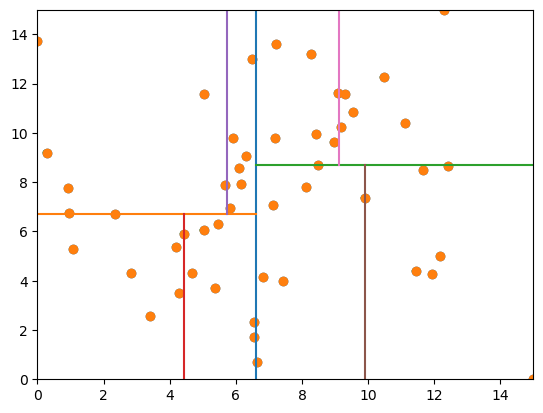

In [140]:
import random
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

gx=9.0
gy=8.5
show_animation = False
ax = 0
ay = 0
max_depth = 3
x = skewnorm.rvs(a=ax, loc=7.5, size=50)
y = skewnorm.rvs(a=ay, loc=7.5, size=50)
x_scaled = (x - x.min()) / (x.max() - x.min()) * 15
y_scaled = (y - y.min()) / (y.max() - y.min()) * 15
# x_scaled = [12.5, 12.5, 12.5, 12.5, 12.5, 11.5, 10.5, 9.5, 8.5, 7.5, 6.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6.5, 7.5,
#            8.5, 9.5, 10.5, 11.5, 12.5]
# y_scaled = [8, 9, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4]
data = np.zeros((len(x_scaled), 2))
for i in range(len(x_scaled)):
    data[i] = [x_scaled[i], y_scaled[i]]
obstacle_list = []

for i in range(len(x_scaled)):
    # radius = random.uniform(0.05, 0.15)
    radius = 0.1
    obstacle_list.append((x_scaled[i], y_scaled[i], radius))

# obstacle_list = [
#     (12.5, 10, 1), (12.5, 11, 1), (12.5, 12, 1), (11.5, 12, 1), (10.5, 12, 1), (9.5, 12, 1),
#     (8.5, 12, 1), (7.5, 12, 1), (6.5, 12, 1), (5.5, 12, 1), (5.5, 11, 1), (5.5, 10, 1), (5.5, 9, 1),
#     (5.5, 8, 1), (5.5, 7, 1), (5.5, 6, 1), (5.5, 5, 1), (5.5, 4, 1), (6.5, 4, 1), (7.5, 4, 1),
#     (8.5, 4, 1), (9.5, 4, 1), (10.5, 4, 1), (11.5, 4, 1), (12.5, 4, 1), (12.5, 5, 1), (12.5, 6, 1)
# ]

medians_collected = collect_medians_of_splits(data, max_depth)
plot_data(data, medians_collected, max_depth, radius)

In [93]:
# # Generating data
# a = 2
# obstacles = 50
# max_depth = 3
# data = np.zeros((len(obstacle_list), 2))
# for i in range(len(obstacle_list)):
#     data[i][0] = obstacle_list[i][0]
#     data[i][1] = obstacle_list[i][1]
# # data = generate_data(a, obstacles)
# medians_collected = collect_medians_of_splits(data, max_depth)
# plot_data(data, medians_collected, max_depth)

In [141]:
goal=[7.5, 11]
start=[0, 0]
print(detect_zone(goal, medians_collected))
print(detect_zone(start, medians_collected))
goal_zone = detect_zone(goal, medians_collected)
start_zone = detect_zone(start, medians_collected)

5
0


In [142]:
from scipy.spatial import distance
Map, zones = create_zones(medians_collected, max_depth)
adjacency_matrix = get_adjacency_matrix(zones)
DZ_normalized = get_DZ(data, medians_collected, zones)
distances = []
for zone in zones:
    # Assuming each zone is represented as a rectangle with (xmin, ymin, xmax, ymax)
    center_x = (zone[0] + zone[2]) / 2
    center_y = (zone[1] + zone[3]) / 2
    # Calculate Euclidean distance from goal to the center of the zone
    dist = distance.euclidean(goal, [center_x, center_y])
    distances.append(dist)
distances_norm = [distan/max(distances) for distan in distances]
allStateActions = setRewards(Map,adjacency_matrix, DZ_normalized, distances_norm)

In [143]:
# Hyperparameters
gamma=0.9
episodes=100
epsilon=0.9
alpha=0.1
Q, policy = train(max_depth, episodes, alpha, gamma, epsilon, allStateActions, goal_zone)

[1. 3. 4. 5. 5. 7. 7. 5.]


KeyboardInterrupt: 

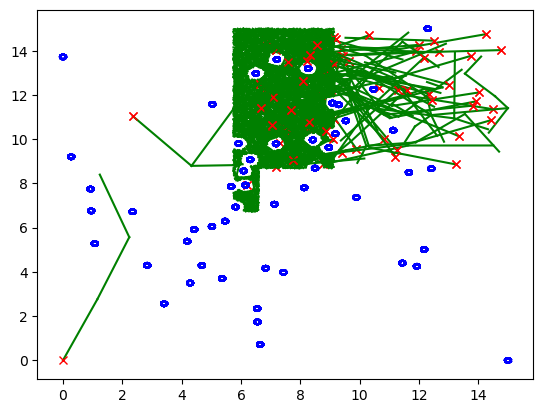

In [144]:
policy = get_final_policy(max_depth, Q, policy)
print(policy)
# obstacle_list = create_obstalces(data)
time, iters = simulate(medians_collected, zones, policy, obstacle_list)
print(f'Algorithm time: {round(time, 3)} seconds\nNumber of iterations: {iters}')

In [ ]:
obstacle_list = [
    (12.5, 10, 1), (12.5, 11, 1), (12.5, 12, 1), (11.5, 12, 1), (10.5, 12, 1), (9.5, 12, 1),
    (8.5, 12, 1), (7.5, 12, 1), (6.5, 12, 1), (5.5, 12, 1), (5.5, 11, 1), (5.5, 10, 1), (5.5, 9, 1),
    (5.5, 8, 1), (5.5, 7, 1), (5.5, 6, 1), (5.5, 5, 1), (5.5, 4, 1), (6.5, 4, 1), (7.5, 4, 1),
    (8.5, 4, 1), (9.5, 4, 1), (10.5, 4, 1), (11.5, 4, 1), (12.5, 4, 1), (12.5, 5, 1), (12.5, 6, 1)
]